In [60]:
#pip install spacy -q

In [61]:
#pip install spacytextblob -q

In [62]:
#!python -m spacy download en_core_web_sm -q

In [63]:
#pip install autocorrect -q

In [64]:
#pip install spellchecker -q

In [65]:
#pip install pyspellchecker -q

In [66]:
#nltk.download('punkt')

In [67]:
#nltk.download('wordnet')

In [153]:
#pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [68]:
import gensim

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer #for vectors
from sklearn.feature_extraction.text import CountVectorizer #for vectors

In [70]:
import nltk  # Text processing libraries for classification, tokenization, stemming, tagging, semantic analysis and reasoning about human language.

from nltk.corpus import abc #  Tool for working with text in the NPL field
from nltk.tokenize import sent_tokenize, word_tokenize # Divide text in sentence and words 
from nltk.corpus import stopwords # A set of common words that are often removed in word processing because they do not contribute much meaning, such as “the”, “is”, “in”, etc. NLTK provides lists of stopwords for different languages.
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer # for Lemmatization

In [71]:
import spacy # Import to displacy function for visualization
from spacy import displacy # Import the displacy function from spaCy for visualization
from spacytextblob.spacytextblob import SpacyTextBlob ## Import the SpacyTextBlob extension for sentiment analysis

In [72]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer #for vectors

In [73]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [134]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score

In [154]:
#visualization
from wordcloud import WordCloud, STOPWORDS

In [74]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
from spellchecker import SpellChecker

In [76]:
import re

In [77]:
df = pd.read_csv('/Users/admin/Desktop/IRONHACK/7.WEEK/py_ml/data/train.csv')
print('Total number of entries in the train dataset are:', len(df))
df.head()

Total number of entries in the train dataset are: 7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## OVERVIEW

- `id` - a unique identifier for each tweet
- `text` - the text of the tweet
- `location` - the location the tweet was sent from (may be blank)
- `keyword` - a particular keyword from the tweet (may be blank)
- `target` - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

### Preliminary Analysis

In [78]:
df.shape

(7613, 5)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [80]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [81]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [82]:
df.isna()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [83]:
data = df[['id', 'text']]
data

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...
7609,10870,@aria_ahrary @TheTawniest The out of control w...
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,Police investigating after an e-bike collided ...


In [84]:
text_df = data[['text']]
text_df['text_copy'] = text_df['text']
text_df

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...,Police investigating after an e-bike collided ...


## Prepare data for NPL

### Data Preprocessing

The procedures involved in the preparation of the text data included in our dataset using Natural Language Processing (NLP). Here are some of the typical actions that we will take:

**1. Lowercasing:** Convert all text to lowercase to standardize it.

**2. Removing URLs:** Eliminate any web links as they are usually not informative for text classification.

**3. Removing special characters and numbers:** These are typically not useful for understanding the sentiment or topic of the text.

**4. Tokenization:** Split text into individual words or tokens.

**5. Removing stopwords:** Stopwords are common words (such as "the", "a", etc.) that may not be useful in some types of text analysis.

**6. Lemmatization:** Reduce words to their base or root form consider the context.

We applied These preprocessing steps to the 'text' column of our training data.

In [85]:
text_df

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...,Police investigating after an e-bike collided ...


In [86]:
nlp = spacy.load("en_core_web_sm")

def process_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Delete URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # eliminar caracteres individuales
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # eliminar caracteres individuales al inicio
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # reemplazar múltiples espacios con uno solo
    
    doc = nlp(text) # It is used to process a text using the NLP pre-trained model.
    
    return text.strip()  # Eliminar espacios en blanco al inicio y final

In [87]:
text_df['text_copy'] = text_df['text_copy'].apply(process_text)

In [88]:
text_df

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfires evacuation ord...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant cranes holding bridge collapse into ...
7609,@aria_ahrary @TheTawniest The out of control w...,aria_ahrary thetawniest the out of control wil...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,m1 94 01 04 utc 5km of volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating after an bike collided wi...


### Lemmatization

In [89]:
def short_words(text):
    # Inicializar el lematizador de WordNet
    wordNetLemmatizer = WordNetLemmatizer()
    # Lematizar el texto
    lemmatized_words = [wordNetLemmatizer.lemmatize(word) for word in text.split()]
    # Procesar el texto utilizando el modelo de SpaCy
    doc = nlp(" ".join(lemmatized_words))
    # Retornar el texto procesado
    return " ".join(lemmatized_words)


In [90]:
text_df['text_copy'] = text_df['text_copy'].apply(short_words)
text_df

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,our deed are the reason of this earthquake may...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all resident asked to shelter in place are bei...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska a sm...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant crane holding bridge collapse into n...
7609,@aria_ahrary @TheTawniest The out of control w...,aria_ahrary thetawniest the out of control wil...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,m1 94 01 04 utc 5km of volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating after an bike collided wi...


### Word Tokenization

Word tokenization is the same as sentence tokenization. But, rather than applying it to sentences, it is used on words so that individual words are separated as items in a list.

In [91]:
def token(word):
    # Tokenization
        
    return word_tokenize(word)

In [92]:
text_df['text_copy'] = text_df['text_copy'].apply(token)
text_df

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,"[our, deed, are, the, reason, of, this, earthq..."
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[all, resident, asked, to, shelter, in, place,..."
3,"13,000 people receive #wildfires evacuation or...","[13, 000, people, receive, wildfire, evacuatio..."
4,Just got sent this photo from Ruby #Alaska as ...,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...
7608,Two giant cranes holding a bridge collapse int...,"[two, giant, crane, holding, bridge, collapse,..."
7609,@aria_ahrary @TheTawniest The out of control w...,"[aria_ahrary, thetawniest, the, out, of, contr..."
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"[m1, 94, 01, 04, utc, 5km, of, volcano, hawaii]"
7611,Police investigating after an e-bike collided ...,"[police, investigating, after, an, bike, colli..."


### Stopword

In [93]:
sp = spacy.load('en_core_web_sm')
sp

In [94]:
def stop_words(row):
    stop_words = set(stopwords.words('english')) # This returns a list of predefined stop words in English.
    spacy_stopwords = sp.Defaults.stop_words # Words ignored in word processing because they are considered uninformative or irrelevant.
    
    filtered_words = []
    
    for word in row:
        if word not in stop_words and word not in spacy_stopwords:
            filtered_words.append(word)
    
    return " ".join(filtered_words)

In [95]:
text_df['text_copy'] = text_df['text_copy'].apply(stop_words)
text_df

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,giant crane holding bridge collapse nearby home
7609,@aria_ahrary @TheTawniest The out of control w...,aria_ahrary thetawniest control wild fire cali...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,m1 94 01 04 utc 5km volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating bike collided car little ...


## FEATURE ENGINEERING

### Word Embedding

Word embedding is the process of converting text into numerical data. Since computers work on only numbers and cannot accurately compute data in the form of strings, words are embedded into a unique integer or numerical code. For example, the word “Severe” is fixed as a number “3214”.

In [96]:
text_df_copy = text_df.copy()

In [97]:
text_df_copy

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,giant crane holding bridge collapse nearby home
7609,@aria_ahrary @TheTawniest The out of control w...,aria_ahrary thetawniest control wild fire cali...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,m1 94 01 04 utc 5km volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating bike collided car little ...


In [98]:
word_embeddings = []
# Iterar sobre cada fila del DataFrame
for index, row in text_df_copy.iterrows():
    text = row["text_copy"]
    doc = nlp(text)
    if len(doc) > 0:
        vector = doc[0].vector  # Puedes ajustar esto según tus necesidades
    else:
        vector = None
    word_embeddings.append(vector)
# Agregar la lista de vectores como una nueva columna en el DataFrame
text_df_copy["Word Embedding"] = word_embeddings

In [193]:
text_df_copy.head()

,text,text_copy,Word Embedding,sentiment,neg,neu,pos,compound,predicted_target,prediction,heuristic_1
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.656,0.344,0.2732,1,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.000,-0.3400,1,1,1
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0


### Sentiment Analysis

In [100]:
sia = SentimentIntensityAnalyzer()

In [101]:
# Define una función que aplique el análisis de sentimiento a un texto y devuelva los resultados
def analyze_sentiment(text):
    return sia.polarity_scores(text)

# Aplica la función a cada fila del DataFrame en la columna 'text_copy'
text_df_copy['sentiment'] = text_df_copy['text_copy'].apply(analyze_sentiment)

In [192]:
text_df_copy.head()

,text,text_copy,Word Embedding,sentiment,neg,neu,pos,compound,predicted_target,prediction,heuristic_1
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.656,0.344,0.2732,1,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.000,-0.3400,1,1,1
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0


In [107]:
# Expande los resultados del análisis de sentimiento en columnas separadas y agrégalas al DataFrame existente
sentiment_scores = text_df_copy['sentiment'].apply(pd.Series) ## Expande los resultados del sentimen en columnas separadas y agrégalas al df
text_df_copy = pd.concat([text_df_copy, sentiment_scores], axis=1)

In [191]:
text_df_copy.head()

,text,text_copy,Word Embedding,sentiment,neg,neu,pos,compound,predicted_target,prediction,heuristic_1
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.656,0.344,0.2732,1,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.000,-0.3400,1,1,1
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0


In [124]:
# Inicializar una lista para almacenar las predicciones
predictions = []
# Iterar sobre cada fila para calcular la predicción basada en las condiciones
for index, row in text_df_copy.iterrows():
    if row['neg'] > 0.4 and row['pos'] < 0.3:
        predictions.append(1)
    else:
        predictions.append(0)

In [190]:
# Agregar la lista de predicciones como una nueva columna en el DataFrame
text_df_copy['prediction'] = predictions
text_df_copy.head()

,text,text_copy,Word Embedding,sentiment,neg,neu,pos,compound,predicted_target,prediction,heuristic_1
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.656,0.344,0.2732,1,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.000,-0.3400,1,1,1
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0


In [127]:
text_df_copy['prediction'].value_counts()

prediction
0    5957
1    1656
Name: count, dtype: int64

In [145]:
# Inicializar una lista para almacenar las predicciones 2
predictions = []
# Iterar sobre cada fila para calcular la predicción basada en las condiciones
for index, row in text_df_copy.iterrows():
    if row['neg'] > 0.2 and row['pos'] < 0.15:
        predictions.append(1)
    else:
        predictions.append(0)

In [146]:
# Agregar la lista de predicciones como una nueva columna en el DataFrame
text_df_copy['heuristic_1'] = predictions
text_df_copy.head()

,text,text_copy,Word Embedding,sentiment,neg,neu,pos,compound,predicted_target,prediction,heuristic_1
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.656,0.344,0.2732,1,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.000,-0.3400,1,0,1
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0,0


In [147]:
text_df_copy['heuristic_1'].value_counts()

heuristic_1
0    4803
1    2810
Name: count, dtype: int64

### Prediction

In [148]:
pred = text_df_copy['prediction']
heu = text_df_copy['heuristic_1']
target = df['target']

#### Prediction test

In [149]:
classif = classification_report(y_pred = pred, y_true = target)
print(classif)

              precision    recall  f1-score   support

           0       0.60      0.82      0.69      4342
           1       0.53      0.27      0.35      3271

    accuracy                           0.58      7613
   macro avg       0.56      0.54      0.52      7613
weighted avg       0.57      0.58      0.55      7613



#### Heuristic test

In [150]:
classif = classification_report(y_pred = heu, y_true = target)
print(classif)

              precision    recall  f1-score   support

           0       0.64      0.71      0.68      4342
           1       0.55      0.48      0.51      3271

    accuracy                           0.61      7613
   macro avg       0.60      0.59      0.59      7613
weighted avg       0.60      0.61      0.61      7613



### Visualization

In [160]:
text_ok = text_df['text_copy']

In [161]:
# Fusiona los DataFrames en base a la columna 'text'
final_df = pd.concat([df, text_ok], axis=1)
final_df.head()

,id,keyword,location,text,target,text_copy
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive wildfire evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [163]:
final_df.shape

(7613, 6)

#### Distribution of Disaster vs. Non-disaster tweets

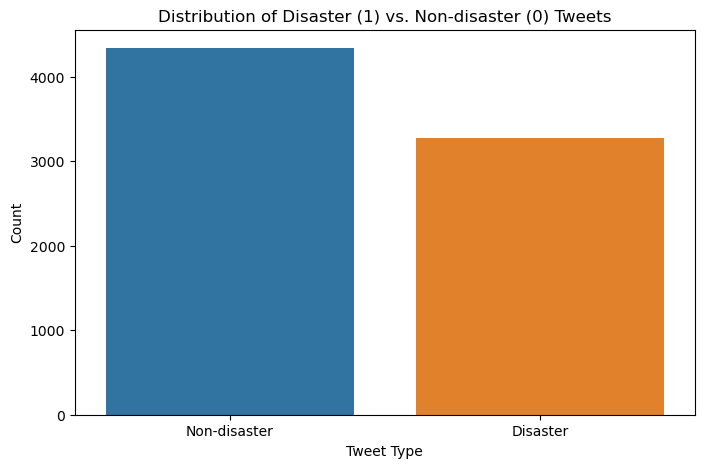

In [174]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=final_df)
plt.title('Distribution of Disaster (1) vs. Non-disaster (0) Tweets')
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-disaster', 'Disaster'])
plt.show()

#### Wordcloud for Disaster & Non-disaster tweets

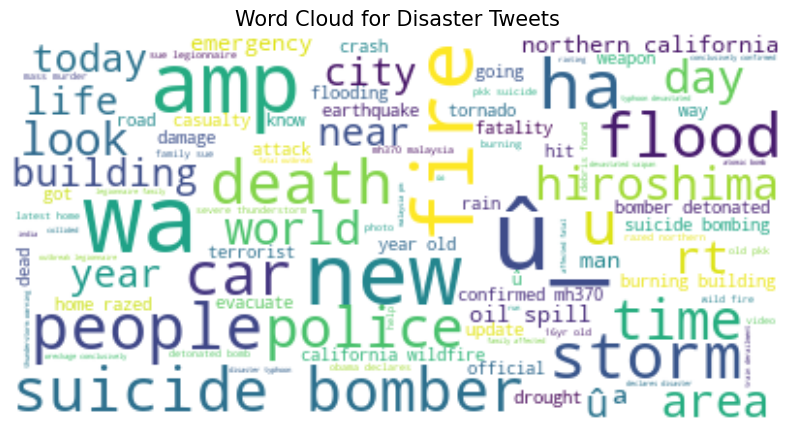

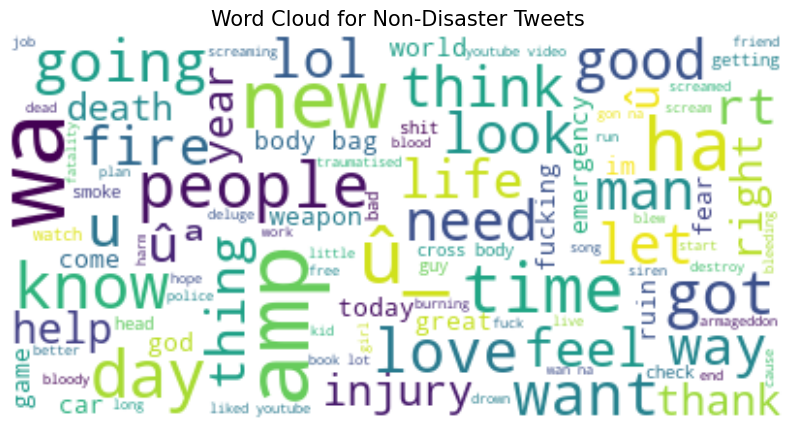

In [166]:
# Function to generate a word cloud
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()

# Generate word clouds for disaster and non-disaster tweets
disaster_tweets = final_df[final_df['target'] == 1]['text_copy']
non_disaster_tweets = final_df[final_df['target'] == 0]['text_copy']

generate_word_cloud(disaster_tweets, "Word Cloud for Disaster Tweets")
generate_word_cloud(non_disaster_tweets, "Word Cloud for Non-Disaster Tweets")

#### Distribution of Twets Lengths by Target

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


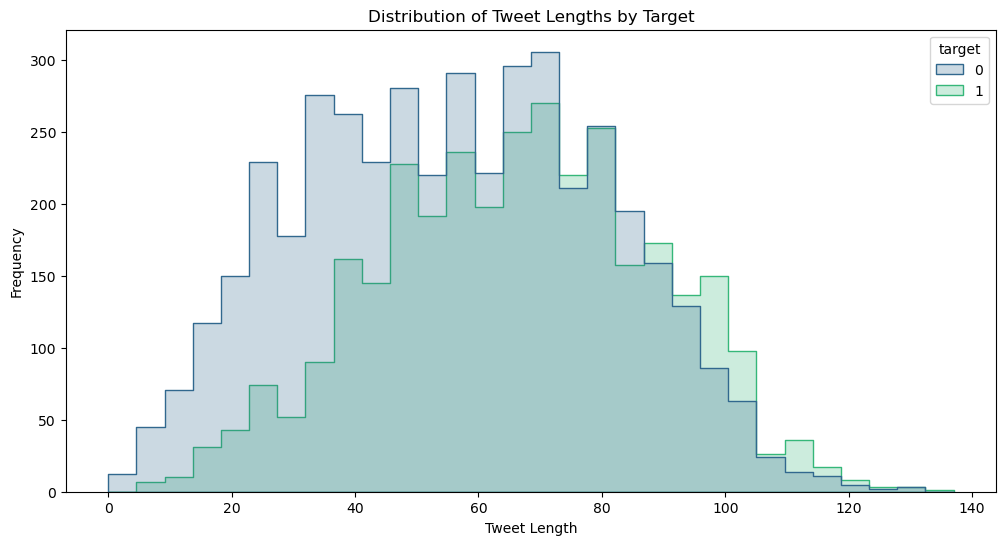

In [171]:
# Calculate the length of each tweet
final_df['tweet_length'] = final_df['text_copy'].apply(len)

# Plot settings
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='tweet_length', hue='target', element='step', palette='viridis', bins=30)
plt.title('Distribution of Tweet Lengths by Target')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

#### Top 10 locations for tweets

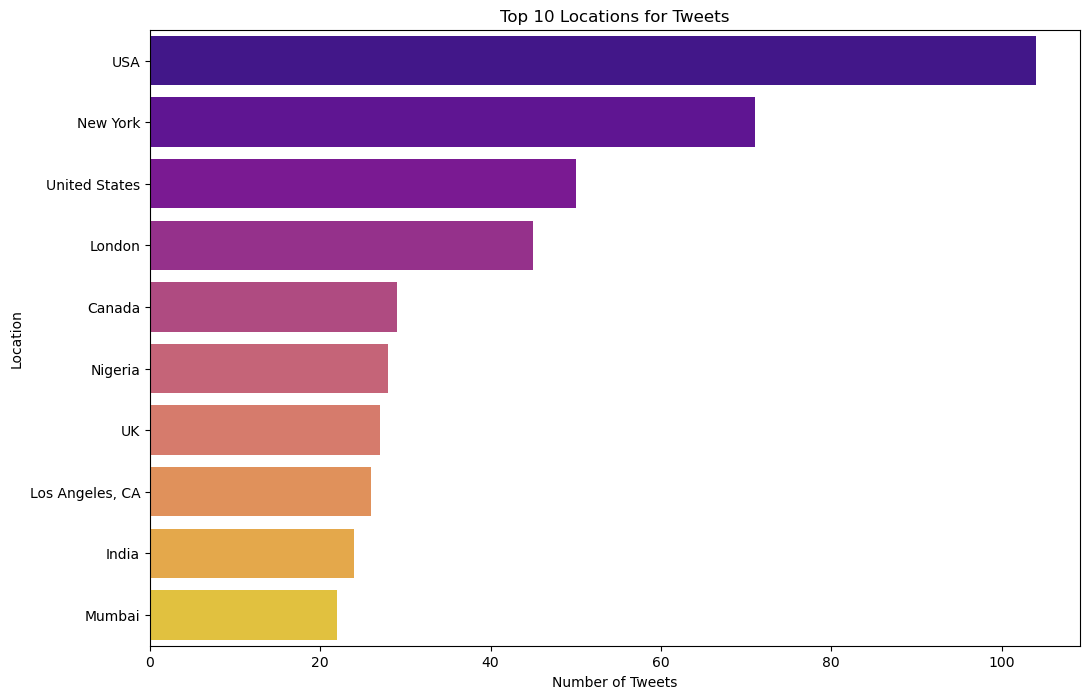

In [173]:
top_locations = final_df['location'].value_counts().head(10)

# Plot settings
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
plt.title('Top 10 Locations for Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.show()

In [182]:
# Convertir top_locations en un DataFrame de Pandas
top_locations_df = pd.DataFrame({'Location': top_locations.index, 'Number of Tweets': top_locations.values})

# Guardar el DataFrame en un archivo CSV
top_locations_df.to_csv('top_locations.csv', index=False)

### Correlation between Tweet lenght vs. Word count

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
final_df['word_count'] = final_df['text'].apply(lambda x: len(x.split()))

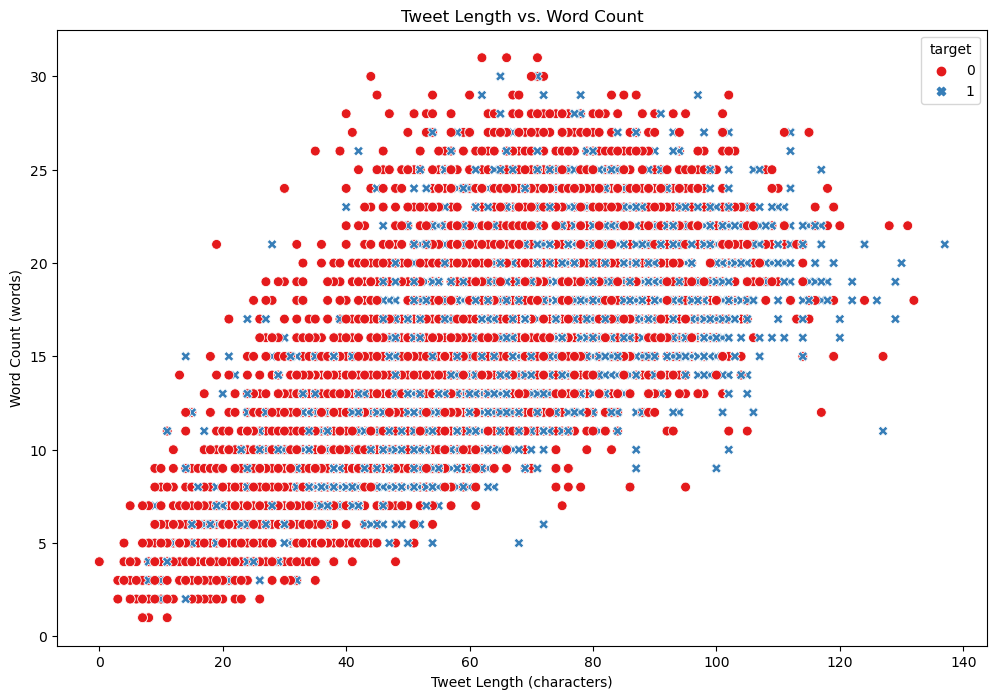

In [186]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=final_df, x='tweet_length', y='word_count', hue='target', style='target', palette='Set1', s=50)
plt.title('Tweet Length vs. Word Count')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Word Count (words)')
plt.savefig('grafico.png')
plt.show()

In [ ]:
sia = SentimentIntensityAnalyzer()
polarity_scores1 = sia.polarity_scores(text[10])

print(f"Sentiment Analysis using NLTK: \n{text[10]} => {polarity_scores1}")